In [1]:
print("Graphs")

Graphs


In [2]:
from utils import draw_graph, draw_graph_nodes

In [ ]:
class UndirectedGraph:
    def __init__(self, labels) -> None:
        self.labels = labels  # ["a", "b", "c"]
        self.num_vertices = len(labels)
        self.adj_matrix = [[0] * self.num_vertices for _ in range(self.num_vertices)]
        # [
        #  [0, 1, 0],
        #  [0, 0, 0],
        #  [0, 0, 0]
        #  ]

    def label_to_index(self, label):
        if label not in self.labels:
            raise ValueError(f"label {label} not found in graph")
        return self.labels.index(label)

    def add_edge(self, label1, label2):  # g.add_edge("a", "b")
        u = self.label_to_index(label1)  # 0
        v = self.label_to_index(label2)  # 1
        self.adj_matrix[u][v] = 1
        self.adj_matrix[v][u] = 1

    def remove_edge(self, label1, label2):
        u = self.label_to_index(label1)
        v = self.label_to_index(label2)
        self.adj_matrix[u][v] = 0
        self.adj_matrix[v][u] = 0

[[0, 0, 0], [0, 0, 1], [0, 1, 0]]


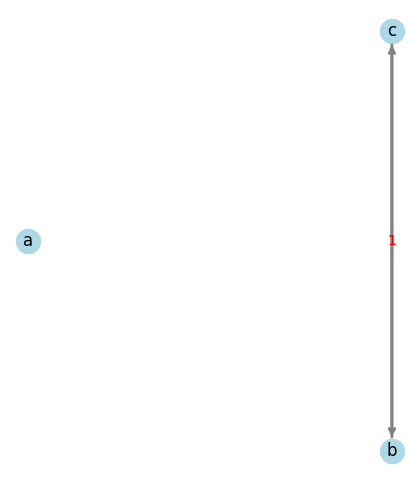

In [11]:
labels = ["a", "b", "c"]
ug = UndirectedGraph(labels)

ug.add_edge("a", "c")
ug.add_edge("c", "b")
ug.remove_edge("c", "a")

print(ug.adj_matrix)

draw_graph(ug)